In [81]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from keras import regularizers
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np



Load the MNIST dataset

In [82]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [7 5 9 3 6 1 4 9 2 8]


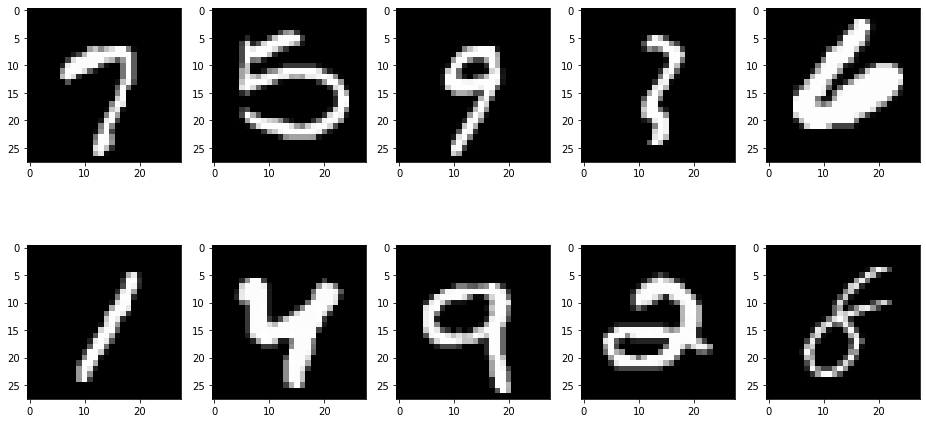

In [83]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [84]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

### L1 Kernel/Bias regularization

In [85]:
model_1=Sequential()

model_1.add(Flatten(input_shape=(28,28)))

model_1.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_1.add(Dense(256,input_dim=64,activation='relu',kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))# Added extra hidden layer
model_1.add(Dense(32,input_dim=64,activation='relu',kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_1.add(Dense(10,input_dim=32,activation='softmax',kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_1.add(Dense(10,input_dim=32,activation='sigmoid',kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))# change to sigmoid or change to ddense layer values
model_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [86]:
model_1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_39 (Dense)            (None, 64)                50240     
                                                                 
 dense_40 (Dense)            (None, 256)               16640     
                                                                 
 dense_41 (Dense)            (None, 32)                8224      
                                                                 
 dense_42 (Dense)            (None, 10)                330       
                                                                 
 dense_43 (Dense)            (None, 10)                110       
                                                                 
Total params: 75,544
Trainable params: 75,544
Non-trai

Train the model

In [87]:
train_info = model_1.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 21s 10ms/step - loss: 3.2364 - accuracy: 0.1101
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 2.3971 - accuracy: 0.1120
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 2.3971 - accuracy: 0.1121
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 2.3971 - accuracy: 0.1104
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 2.3971 - accuracy: 0.1118
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 2.3971 - accuracy: 0.1124
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.3971 - accuracy: 0.1120
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 2.3971 - accuracy: 0.1121
Epoch 9/10
1875/1875 [==============================] - 23s 12ms/step - loss: 2.3970 - accuracy: 0.1116
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step -

Plot the loss and accuracy graphs

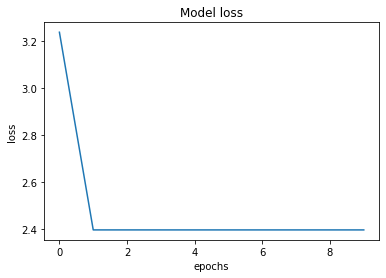

In [88]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

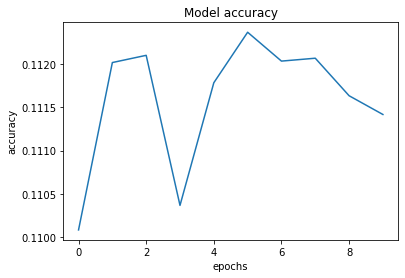

In [89]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [90]:
loss, acc = model_1.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 3s 7ms/step - loss: 2.3975 - accuracy: 0.1135
Loss of the Test dataset is: 2.3974530696868896
Accuracy of the test dataset is: 0.11349999904632568


### Confusion Matrix

In [91]:
predictions = model_1.predict(new_test_data)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 2s 5ms/step


In [92]:
conf_matrix = confusion_matrix(test_target, predicted_labels)

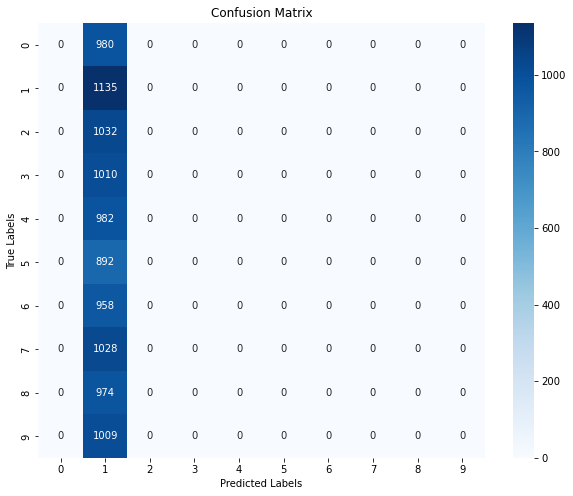

In [93]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Save the model weights

In [94]:
model_1.save_weights('MNIST_WEIGHTS_V1.h5')

### L2 Kernel/Bias regularization

In [95]:
model_2=Sequential()

model_2.add(Flatten(input_shape=(28,28)))

model_2.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_2.add(Dense(256,input_dim=64,activation='relu',kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))# Added extra hidden layer
model_2.add(Dense(32,input_dim=64,activation='relu',kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_2.add(Dense(10,input_dim=32,activation='softmax',kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_2.add(Dense(10,input_dim=32,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))# change to sigmoid or change to ddense layer values
model_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [96]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_44 (Dense)            (None, 64)                50240     
                                                                 
 dense_45 (Dense)            (None, 256)               16640     
                                                                 
 dense_46 (Dense)            (None, 32)                8224      
                                                                 
 dense_47 (Dense)            (None, 10)                330       
                                                                 
 dense_48 (Dense)            (None, 10)                110       
                                                                 
Total params: 75,544
Trainable params: 75,544
Non-tra

In [97]:
train_info = model_2.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 2.3711 - accuracy: 0.1143
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 2.3016 - accuracy: 0.1121
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 2.3017 - accuracy: 0.1124
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 2.3017 - accuracy: 0.1124
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 2.3017 - accuracy: 0.1120
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 2.3017 - accuracy: 0.1124
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 2.3017 - accuracy: 0.1124
Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 2.3016 - accuracy: 0.1124
Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 2.3017 - accuracy: 0.1118
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - 

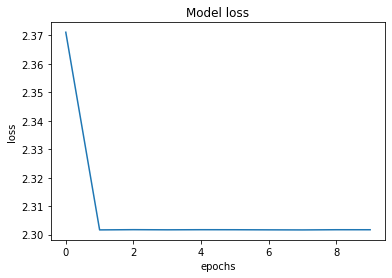

In [98]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

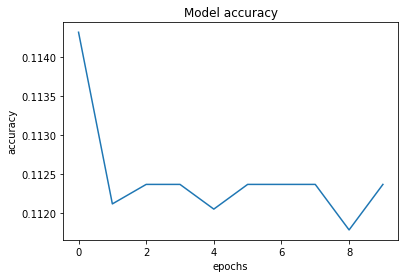

In [99]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

In [100]:
loss, acc = model_2.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 3s 8ms/step - loss: 2.3014 - accuracy: 0.1135
Loss of the Test dataset is: 2.301401138305664
Accuracy of the test dataset is: 0.11349999904632568


In [101]:
predictions = model_2.predict(new_test_data)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 2s 5ms/step


In [102]:
conf_matrix = confusion_matrix(test_target, predicted_labels)

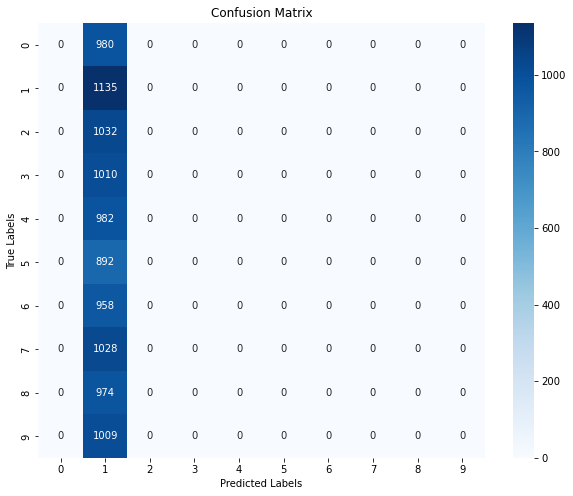

In [103]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [104]:
model_2.save_weights('MNIST_WEIGHTS_V2.h5')